<a class="anchor" id="section-0"></a>
<img src="https://i.imgur.com/lTCPbz0.jpeg" alt='logo puc-sp' width='30%' align='left'>

### Pontifícia Universidade Católica de São Paulo (PUC-SP)

<h1 style=font-size:30px>Treinando Preditores Lineares e Logísticos</h1>


### Bacharelado em Ciência de Dados e Inteligência Artificial

#### Turma: CDIA21-MA

**Aluno:** Lucas Lopes Amorim

**Professor:** Jefferson de Oliveira Silva

**Dúvidas:**

Scaling muda a correlação?
    
    Não.

A correlação de Pearson funciona para features binárias? Posso confiar?

    Pode confiar se a variável discreta ou contínua for uma reta.
   

Devo experimentar feature engineering com todas as variáveis ou só as que tem correlação alta?

Fit do scalling por coluna ou por dataset?

Regressão linear pode ser feita para prever variável não-contínua?

A maioria dos modelos lineares se beneficia da padronização dos dados. Por que frequentemente padronizar é melhor que normalizar?

Como lidar com outliers? Posso simplesmente remove-los?

#### Próximos Passos:
- [x] explorar os feature selectors do sklearn
- [ ] explorar mais os dados com dataviz
- [x] reduzir o número de classes do output
- [ ] regressão linear
- [x] trazer nps para a análise exploratória
- [x] reduzir código repetido

**Estrutura:**

1. [Análise Exploratória](#section-1)\
    1.1. [Classificando variáveis](#section-1-1)\
    1.2. [Simplificando classes](#section-1-2)
2. [Predizendo a motivação dos alunos](#section-2)\
    2.1. [Selecionando Features com o auxílio do scikit-learn](#section-2-1)\
    2.2. Regressão Logística multiclasse (1 feature)\
    2.3. [Regressão Logística multiclasse (3 features)](#section-2-3)\
    2.4. [Regressão Logística multiclasse simplificada](#section-2-4)
3. [Predizendo renda dos alunos](#section-3)\
    3.1. [Selecionando Features com o auxílio do scikit-learn](#section-3-1)\
    3.2. [Regressão Linear (1 feature)](#section-3-2)\
    3.3. [Regressão Linear multi-feature](#section-3-3)

# 1. Análise Exploratória <a class="anchor" id="section-1"></a>
[Voltar ao topo](#section-0)

In [1]:
import pandas as pd
import numpy as np
import random
from cdia.datasets import DatasetEstudantes
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
sns.set(font_scale=2)
pd.plotting.register_matplotlib_converters()

In [2]:
n_amostra = 10000

random.seed(42)
#  O método criar retorna um DataFrame (Pandas)
df = DatasetEstudantes.criar(n_amostra)

In [3]:
df.head()

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,cod_curso,logradouro,numero,bairro,cidade,uf,cep,motivação
0,RA55000001,Maceane Arantes,19,73.0,1,2,3,1,112,Rua Emílio Barbosa,875,Vila Prudente,São Paulo,SP,03135-040,10
1,RA55000002,Ecilo Abranches,19,80.0,1,1,3,1,34,Rua Major Walter Carlson,532,Jardim Arpoador,São Paulo,SP,05565-210,10
2,RA55000003,Wellington Colaço Gomide,19,35.0,1,1,3,1,24,Rua Major Almeida Queiroz,127,Instituto de Previdência,São Paulo,SP,05531-020,9
3,RA55000004,Kazuhiko Frajuca Batata Galvão,19,230.0,1,1,3,1,8,Rua Capitão Prudente,202,Pinheiros,São Paulo,SP,05422-050,9
4,RA55000005,Teixeira Mirandela Caeira,19,456.0,1,1,3,1,50,Rua João Gomes,306,Jardim Herculano,São Paulo,SP,04920-040,9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   matrícula   10000 non-null  object 
 1   nome        10000 non-null  object 
 2   idade       10000 non-null  int64  
 3   renda       10000 non-null  float64
 4   cor         10000 non-null  int64  
 5   sexo        10000 non-null  int64  
 6   ano_curso   10000 non-null  int64  
 7   escola      10000 non-null  int64  
 8   cod_curso   10000 non-null  int64  
 9   logradouro  10000 non-null  object 
 10  numero      10000 non-null  object 
 11  bairro      10000 non-null  object 
 12  cidade      10000 non-null  object 
 13  uf          10000 non-null  object 
 14  cep         10000 non-null  object 
 15  motivação   10000 non-null  int32  
dtypes: float64(1), int32(1), int64(6), object(8)
memory usage: 1.2+ MB


In [9]:
df.describe()

,idade,renda,cor,sexo,ano_curso,escola,cod_curso,motivação
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000
mean,21.447500,5660.189578,1.140000,1.500000,3.616800,1.496800,56.43790,5.93780
std,5.047969,46388.484595,0.347004,0.500025,0.967084,0.500015,32.45729,3.16647
min,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.00000
25%,19.000000,1189.000000,1.000000,1.000000,3.000000,1.000000,28.00000,3.00000
50%,20.000000,1885.440000,1.000000,1.500000,4.000000,1.000000,56.00000,6.00000
75%,21.000000,2866.000000,1.000000,2.000000,4.000000,2.000000,85.00000,9.00000
max,50.000000,998363.000000,2.000000,2.000000,5.000000,2.000000,112.00000,10.00000


<Figure size 432x288 with 0 Axes>

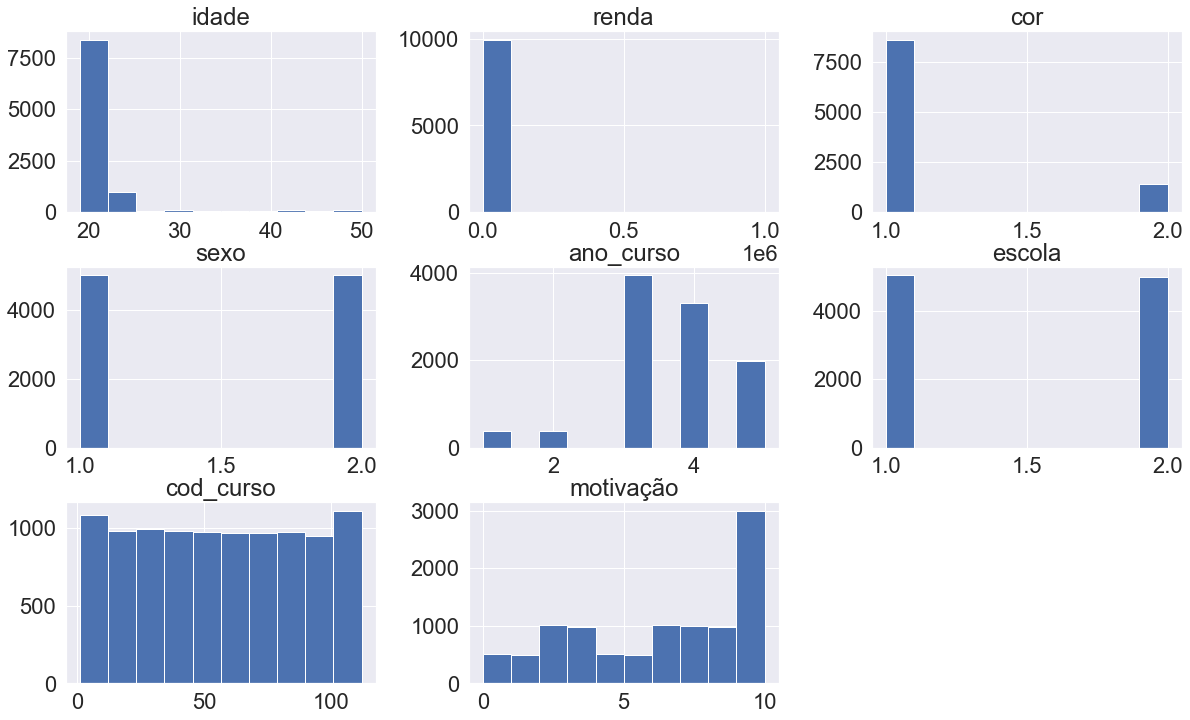

In [10]:
plt.figure()
df.hist(figsize=(20,12))
plt.show()

## 1.1. Classificando Variáveis <a class="anchor" id="section-1-1"></a>
[Voltar ao topo](#section-0)

<img src="https://i.imgur.com/YkVxGWv.png" width="75%">

<p>Vamos agora classificar as nossas features(ou colunas) para entender melhorar como conduzir nossa análise exploratória.</p>

<table align='left' style="font-size:15px">
<thead>
  <tr>
    <th>feature</th>
    <th></th>
    <th></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="font-weight:bold">idade</td>
    <td style="background-color:#636EFA">Quantitativa</td>
    <td  style="background-color:#f58518">Discreta</td>
  </tr>
  <tr>
    <td style="font-weight:bold">renda</td>
    <td style="background-color:#636EFA">Quantitativa</td>
    <td style="background-color:#FECB52">Contínua</td>
  </tr>
  <tr>
    <td style="font-weight:bold">cor</td>
    <td style="background-color:#EF553B">Qualitativa</td>
    <td style="background-color:#72B7B2">Nominal</td>
  </tr>
  <tr>
    <td style="font-weight:bold">sexo</td>
    <td style="background-color:#EF553B">Qualitativa</td>
    <td style="background-color:#72B7B2">Nominal</td>
  </tr>
  <tr>
    <td style="font-weight:bold">ano_curso</td>
    <td style="background-color:#EF553B">Qualitativa</td>
    <td style="background-color:#AB63FA">Ordinal</td>
  </tr>
  <tr>
    <td style="font-weight:bold">escola</td>
    <td style="background-color:#EF553B">Qualitativa</td>
    <td style="background-color:#72B7B2">Nominal</td>
  </tr>
  <tr>
    <td style="font-weight:bold">motivação</td>
    <td style="background-color:#EF553B">Qualitativa</td>
    <td style="background-color:#AB63FA">Ordinal</td>
  </tr>
</tbody>
</table>
<p style="margin-left:275px;margin-top:50px">
    Classificar nossas variáveis é importante para nos ajudar a escolher que tipo de gráfico podemos usar para visualizar a relação entre elas. Por exemplo, se quisermos plottar um gráfico de <b>dispersão</b>, precisamos de <i>pelo menos uma</i> variável <b>contínua</b>, caso contrário os pontos do gráfico ficariam todos aglutinados em alguns poucos pontos de interceção entre as variáveis.
</p>
<p style="margin-left:275px">
    Além disso, é de suma importância para escolhermos que modelo iremos usar para tentar predizer alguma delas. Exemplo: Se quisermos prever o valor da <b>motivação</b>, é preferível usarmos um método de <b>classificação</b>, afinal essa é uma feature <i>qualitativa</i> (cada nível de motivação pode ser entendido como uma classe)
    </p>

A partir desse entendimento, vamos criar agora um histograma para visualizar a distribuição da coluna renda no nosso dataset!

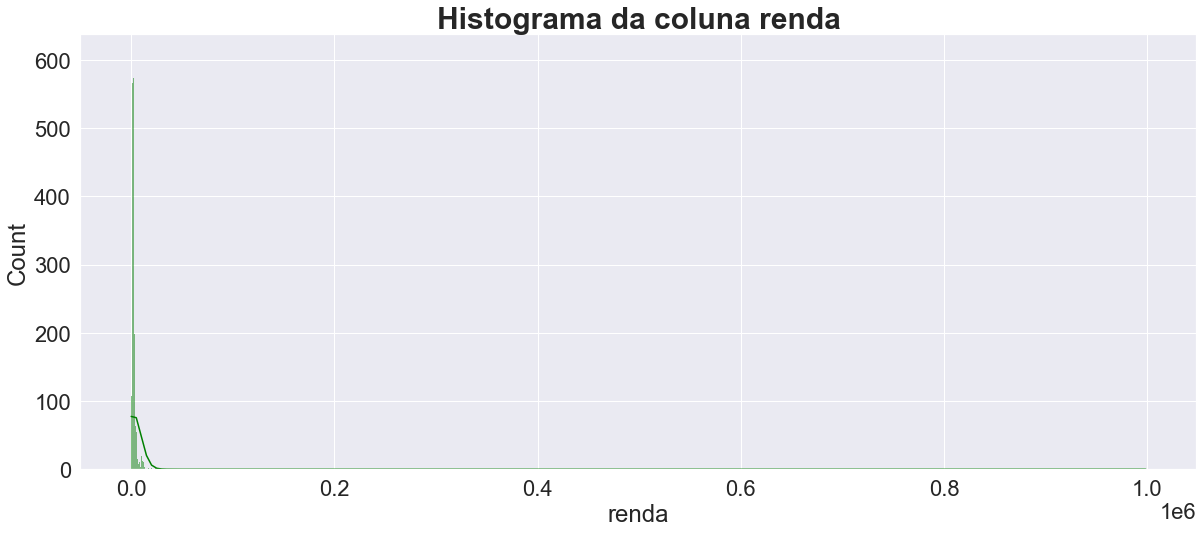

In [83]:
plt.figure(figsize=(20,8))
plt.title("Histograma da coluna renda", weight='bold').set_fontsize(30)
sns.histplot(data=df, x='renda', kde=True, log_scale=False, color='green')
plt.show()

Quando criamos um histograma da coluna renda, como a escala é linear e a **ordem de grandeza** entre os valores mínimos e máximos **é muito discrepante**, fica quase impossível de visualizarmos a distribuição, como é possível verificar na figura acima.

Uma forma de solucionar esse problema é alterando a escala do gráfico. A escala tradicional dos gráficos é uma **escala linear**, isso é, a cada "salto" entre um ponto e o outro do gráfico uma quantidade *constante* de valores é percorrida. Por exemplo, observe a seguinte escala: $[1,2,3,4,5]$. Nela para sabermos o novo valor basta *adicionarmos* uma constante ao valor anterior, nesse caso, o número 1 e o "salto" entre cada ponto é *fixo*, nesse caso, também 1.

Uma alternativa muito usada para a escala linear é a **escala logarítmica**. Nessa escala a cada "salto" entre um ponto e o outro do gráfico uma quantidade *variável* de valores é percorrida. Por exemplo, observe a seguinte escala: $[1,10,100,1000,10000]$. Nela para sabermos o novo valor basta *multiplicarmos* uma constante ao valor da base do logarítmo que gerou essa escala, nesse caso, o número 10 e o "salto" entre cada ponto é *variável*, nesse caso, $[9,99,999,...]$ e assim por diante.

Os principal caso de uso para se usar uma escala logarítma é quando temos uma variável que varia exponecialmente, pois essa escala também varia exponencialmente, sendo uma ótima forma de comparar pequenas diferenças entre valores de baixa ordem de grandeza e também pequenas diferenças entre valores de ordem de grandeza alta em um mesmo gráfico - porém, essa escala não é nada representativa para comparar valores de diferentes ordens de grandeza.

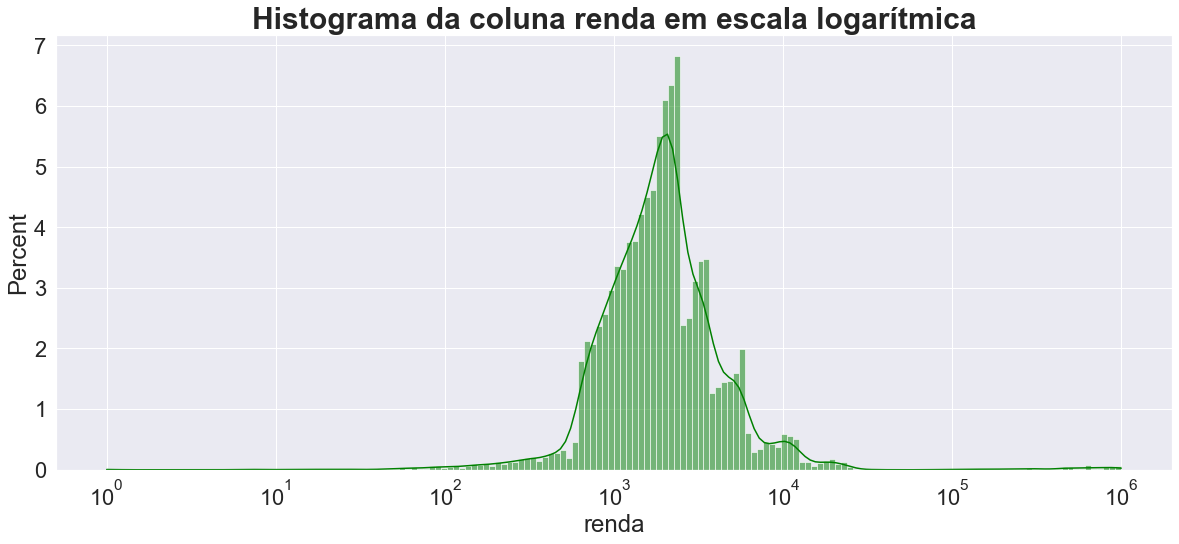

In [113]:
plt.figure(figsize=(20,8))
plt.title("Histograma da coluna renda em escala logarítmica", weight='bold').set_fontsize(30)
sns.histplot(data=df, x='renda', kde=True, log_scale=True, color='green', stat='percent')
plt.show()

Oba! Agora conseguimos visualizar bem melhor como é a distribuição de renda no nosso dataset 😃

In [13]:
# Criando DataFrame suporte para os próximos gráficos
temp_df = pd.DataFrame({
    'motivação': df['motivação'],
    'renda':np.log10(df['renda']).replace([np.inf, -np.inf], 0),
    'escola': df['escola'].replace({1:0, 2:1}),
    'idade': df['idade']
})

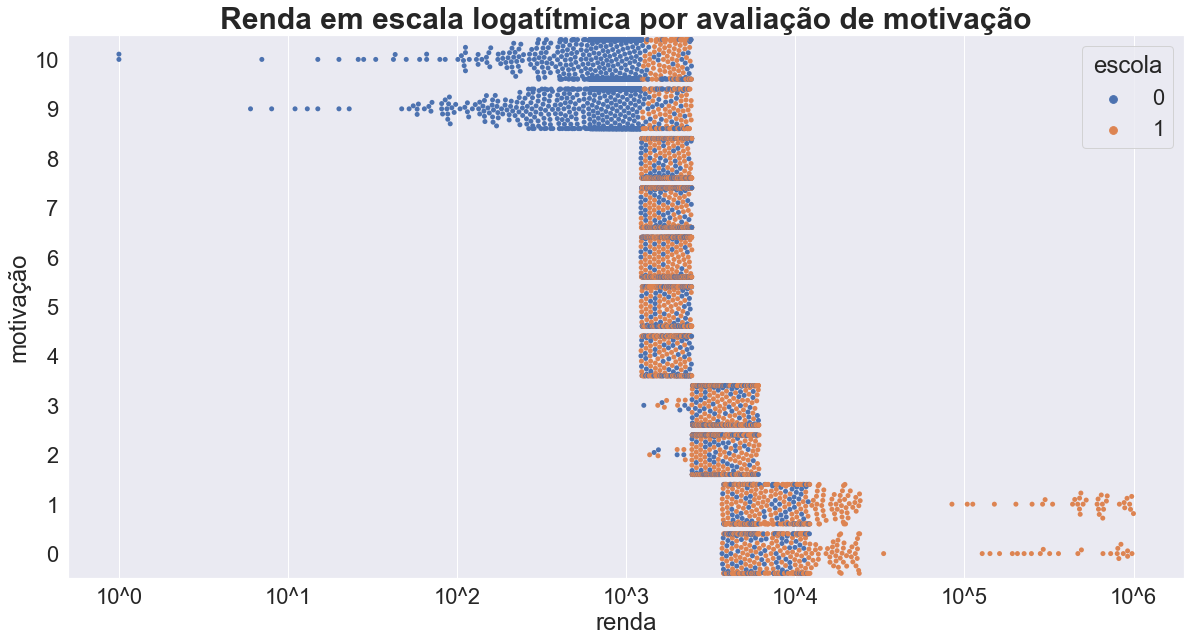

In [14]:
plt.figure(figsize=(20,10))
plt.title('Renda em escala logatítmica por avaliação de motivação', weight='bold').set_fontsize(30)
sns.swarmplot(
    x='renda', 
    y='motivação', 
    data=temp_df, 
    palette=sns.color_palette(), 
    hue='escola', 
    orient='h', 
    order=[i for i in range(10, -1, -1)]
)
plt.xticks([i for i in range(7)], [f'10^{i}' for i in range(7)])
plt.show()

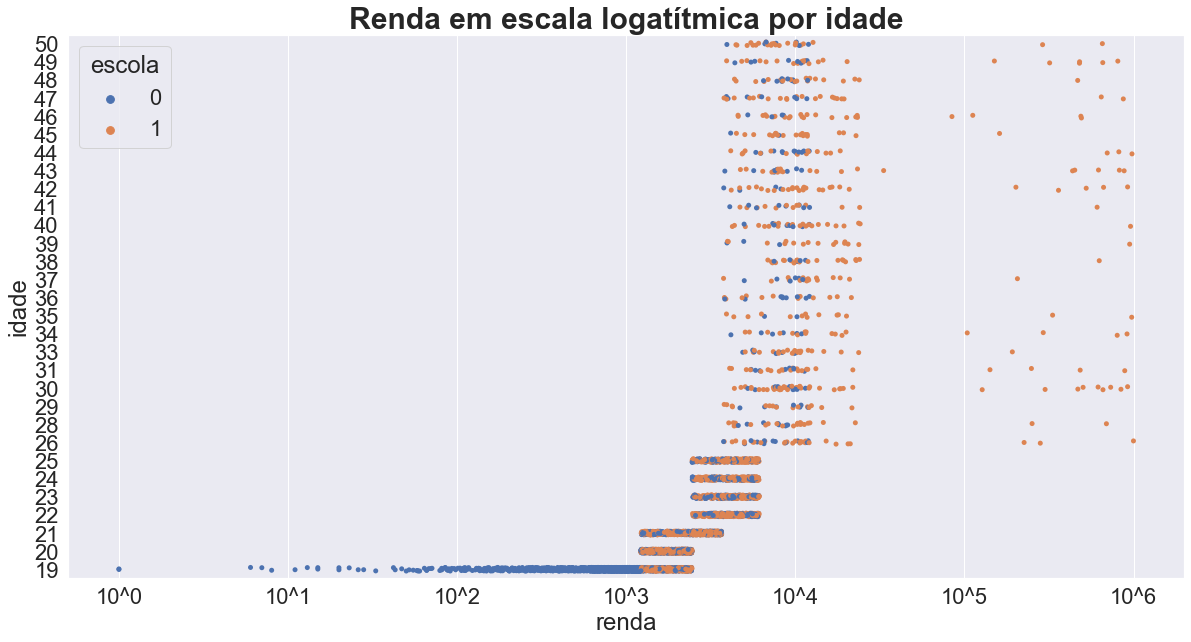

In [17]:
plt.figure(figsize=(20,10))
plt.title('Renda em escala logatítmica por idade', weight='bold').set_fontsize(30)
sns.stripplot(
    x='renda',
    y='idade',
    data=temp_df,
    palette=sns.color_palette(),
    hue='escola',
    orient='h',
    order=temp_df['idade'].value_counts().index.sort_values(ascending=False)
)
plt.xticks([i for i in range(7)], [f'10^{i}' for i in range(7)])
plt.show()

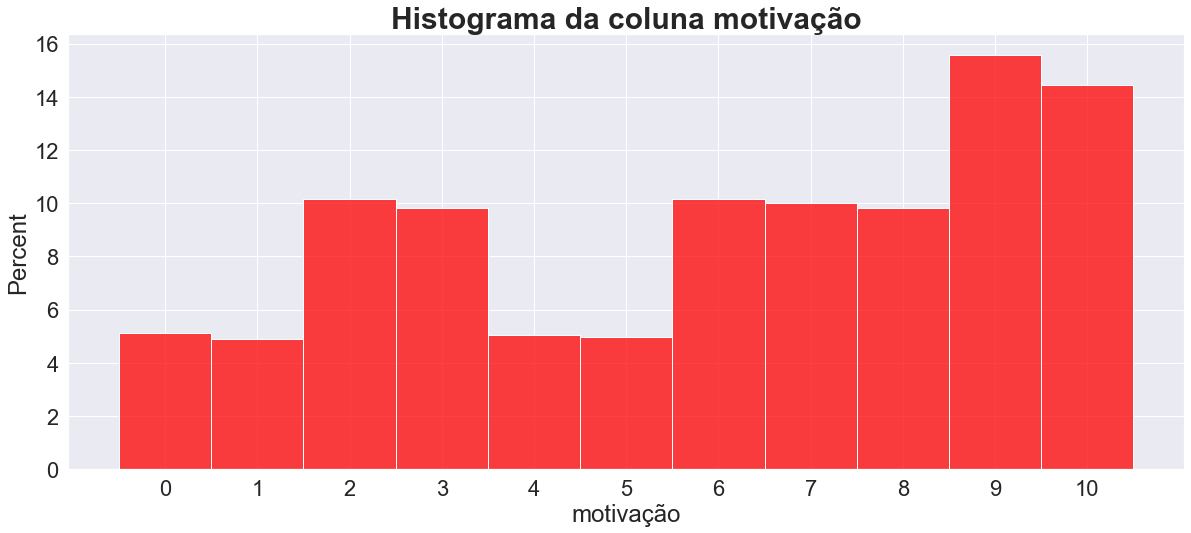

In [280]:
plt.figure(figsize=(20,8))
plt.title("Histograma da coluna motivação", weight='bold').set_fontsize(30)
sns.histplot(data=df, x='motivação', log_scale=False, color='red', bins=11, discrete=True, stat='percent')
plt.xticks([i for i in range(11)])
#plt.xticks([i+0.25 for i in range(11)], [0,1,2,3,4,5,6,7,8,9,10])
#plt.xticks([i for i in range(11)], [i for i in range(11)])
plt.show()

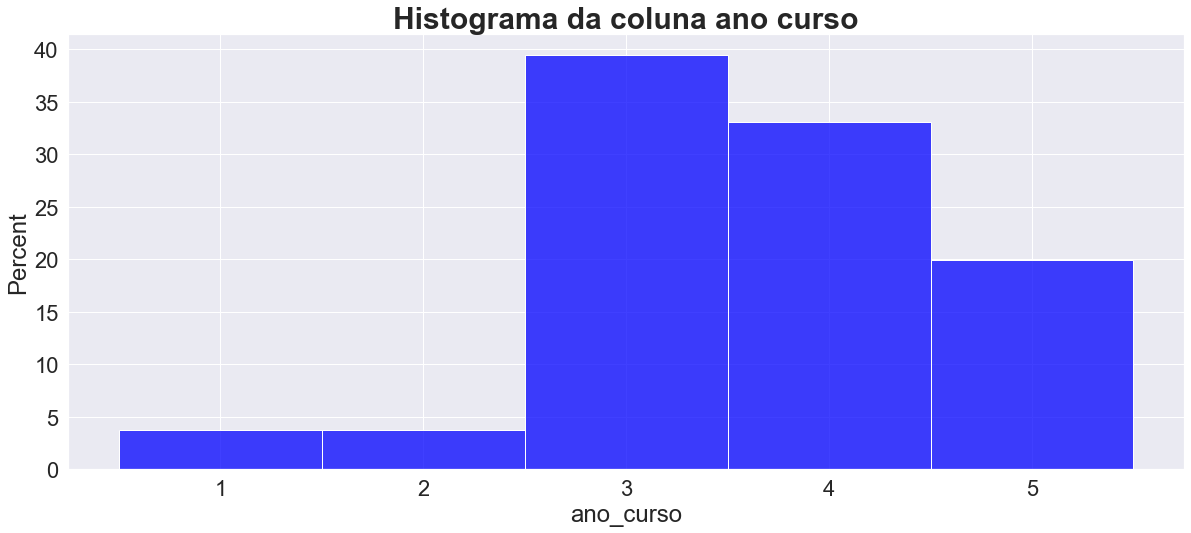

In [281]:
plt.figure(figsize=(20,8))
plt.title("Histograma da coluna ano curso", weight='bold').set_fontsize(30)
sns.histplot(data=df, x='ano_curso', log_scale=False, color='blue', discrete=True, stat='percent')
plt.show()

## 1.2 Simplificando classes<a class="anchor" id="section-1-2"></a>
[Voltar ao topo](#section-0)

<img src='https://i.imgur.com/0MZZ8gj.jpg'>

Um dos indicadores mais famosos do mercado é o NPS (Net Promotor Score). Baseado em uma escala de 1 a 10 ele classifica clientes/funcionários como promotores, neutros ou detratores de uma empresa. Podemos utilizar a mesma lógica para **diminuir o número de classes** que o nosso output irá apresentar, dessa forma **simplificando nosso modelo e aumentando a sua acurácia.**

Dessa forma, ficaremos com 3 classes: $[\text{desmotivados},\;\text{neutros},\;\text{motivados}]$

In [19]:
def simplificar_motivacao(target):
    """
    Transforma as 11 features do target original
    em 3 features: 'desmotivados', 'neutros' e
    'motivados'.
    """
    
    conditions = [
        target <= 6,
        (target >= 7) & (target <= 8),
        target >= 9
    ]

    choices = [
        'desmotivados',
        'neutros',
        'motivados'
    ]

    return np.select(conditions, choices)
    

**Ideias de gráficos a fazer:**
- [x] idade x renda: quebrar a motivação em 3 classes e mostrar gráfico scatter com a renda pra cada idade discriminando por motivação
- [ ] motivação x idade: quebrar a motivação em 3 classes e mostrar gráfico de barras horizontal com a motivação pra cada idade

In [84]:
temp_df['motivação_simples'] = simplificar_motivacao(temp_df['motivação'])

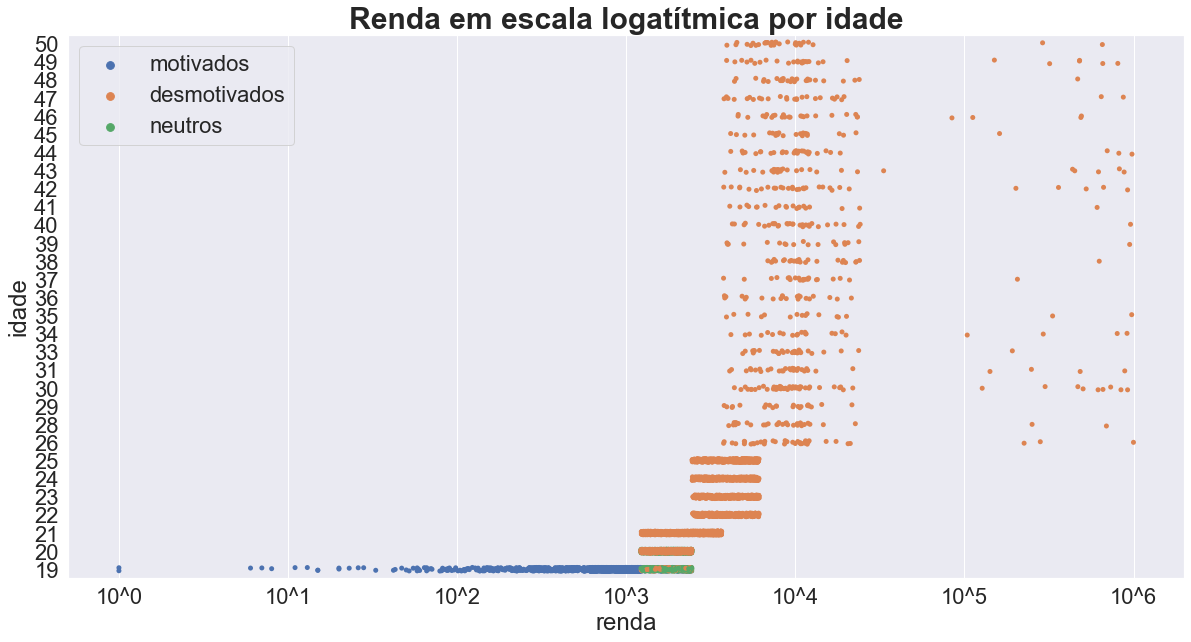

In [88]:
plt.figure(figsize=(20,10))
plt.title('Renda em escala logatítmica por idade', weight='bold').set_fontsize(30)
sns.stripplot(x='renda', y='idade', data=temp_df, palette=sns.color_palette(), hue='motivação_simples', orient='h', order=temp_df['idade'].value_counts().index.sort_values(ascending=False))
plt.xticks([i for i in range(7)], [f'10^{i}' for i in range(7)])
plt.legend()
plt.show()

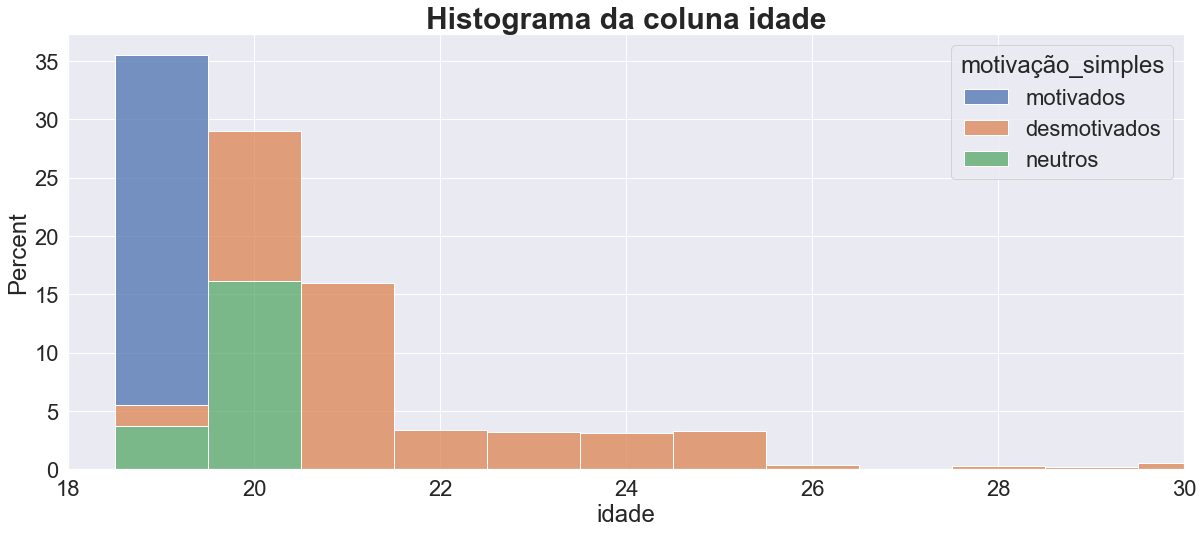

In [284]:
plt.figure(figsize=(20,8))
plt.title("Histograma da coluna idade", weight='bold').set_fontsize(30)
sns.histplot(data=temp_df, x='idade', hue='motivação_simples', color='red', multiple="stack", stat='percent', discrete=True)
plt.xlim(18,30)
plt.show()

In [5]:
df['renda'] = np.log10(df['renda'])

In [6]:
df.corr()

,idade,renda,cor,sexo,ano_curso,escola,cod_curso,motivação
idade,1.000000,0.640468,0.000686,-0.008819,-0.117262,0.199101,0.011878,-0.615621
renda,0.640468,1.000000,0.013508,-0.003738,0.085593,0.417273,0.005028,-0.764010
cor,0.000686,0.013508,1.000000,0.016715,0.007892,0.010571,0.004285,-0.009109
sexo,-0.008819,-0.003738,0.016715,1.000000,-0.000207,0.006200,-0.016105,0.012089
ano_curso,-0.117262,0.085593,0.007892,-0.000207,1.000000,0.227115,-0.006693,-0.231617
escola,0.199101,0.417273,0.010571,0.006200,0.227115,1.000000,-0.008810,-0.411248
cod_curso,0.011878,0.005028,0.004285,-0.016105,-0.006693,-0.008810,1.000000,-0.000428
motivação,-0.615621,-0.764010,-0.009109,0.012089,-0.231617,-0.411248,-0.000428,1.000000


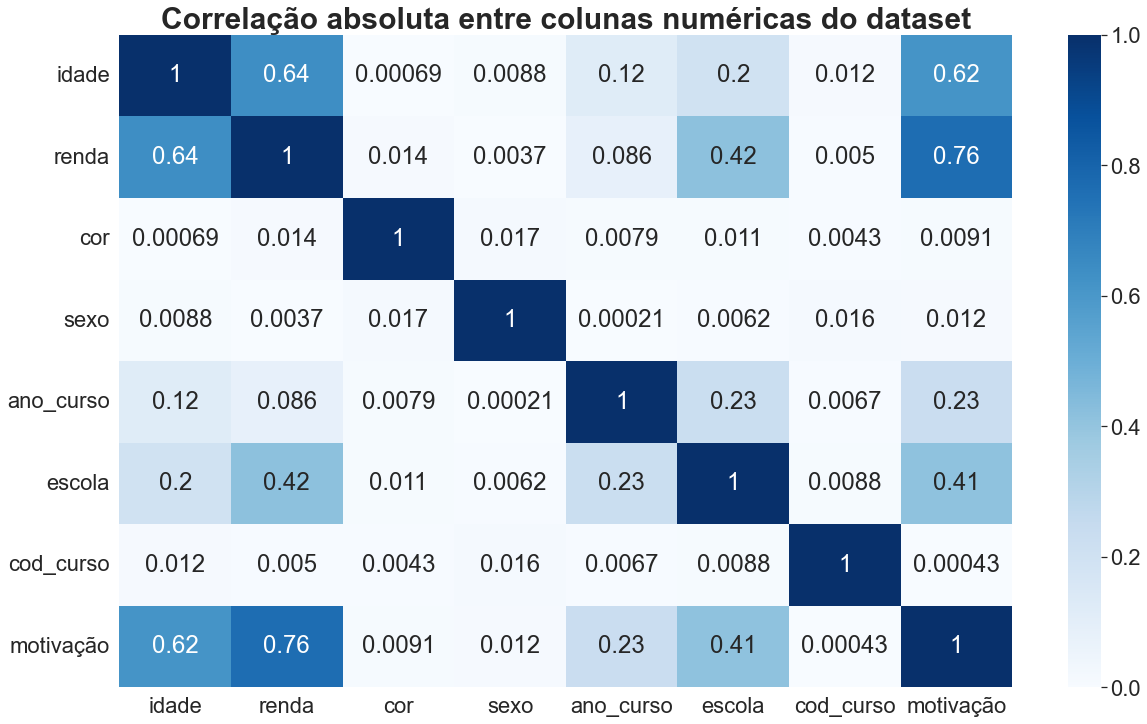

In [7]:
plt.figure(figsize=(20,12))
plt.title('Correlação absoluta entre colunas numéricas do dataset', weight='bold').set_fontsize(30)
sns.heatmap(df.corr().abs(), vmin=0, vmax=1, annot=True, cmap='Blues')
plt.show()

In [23]:
#train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# 2. Predizendo a motivação dos alunos<a class="anchor" id="section-2"></a>
[Voltar ao topo](#section-0)

Como motivação é um valor **qualitativo**, podemos usar a **Regressão Logística** para predize-la.

In [24]:
from sklearn.linear_model import LogisticRegression

## 2.1 Selecionando Features com o auxílio do scikit-learn<a class="anchor" id="section-2-1"></a>
[Voltar ao topo](#section-0)

Após muito pesquisar, optei por usar o *recursive feature elimination* (**RFE**) 

In [25]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [26]:
def column_processors(feat):
    """
    Aplica algorítmos de scaling para cada uma das features
    """
    if 'idade' in feat.columns:
        # Padronizar a coluna idade
        scaler = StandardScaler().fit(feat['idade'].values.reshape(-1, 1))
        feat['idade'] = scaler.transform(feat['idade'].values.reshape(-1, 1))
    
    if 'renda' in feat.columns:
        # Como renda aproxima-se de uma distribuição exponencial, vamos tirar o log10 dela
        renda = pd.Series(np.log10(feat['renda'])).replace([np.inf, -np.inf], 0)
        feat['renda'] = renda
        # Padronizar a coluna renda
        scaler = StandardScaler().fit(feat['renda'].values.reshape(-1, 1))
        feat['renda'] = scaler.transform(feat['renda'].values.reshape(-1, 1))
    
    if 'cor' in feat.columns:
        # Tranformar a coluna cor em binário
        enc = OneHotEncoder(drop='first').fit(feat['cor'].values.reshape(-1, 1))
        feat['cor'] = enc.transform(feat['cor'].values.reshape(-1, 1)).toarray()
    
    if 'sexo' in feat.columns:
        # Tranformar a coluna sexo em binário
        enc = OneHotEncoder(drop='first').fit(feat['sexo'].values.reshape(-1, 1))
        feat['sexo'] = enc.transform(feat['sexo'].values.reshape(-1, 1)).toarray()
    
    if 'ano_curso' in feat.columns:
        # Tranformar a coluna ano_curso em binário
        enc = OneHotEncoder(drop='first').fit(feat['ano_curso'].values.reshape(-1, 1))
        ano_curso_cols = enc.transform(feat['ano_curso'].values.reshape(-1, 1)).toarray()
        feat = pd.concat(
            [feat, pd.DataFrame(ano_curso_cols, columns=[f'{i+1}ano_curso' for i in range(ano_curso_cols.shape[1])])],
            axis=1
        )
        #feat.drop('ano_curso', axis=1, inplace=True)
        # Padronizar a coluna ano_curso
        scaler = StandardScaler().fit(feat['ano_curso'].values.reshape(-1, 1))
        feat['ano_curso'] = scaler.transform(feat['ano_curso'].values.reshape(-1, 1))
    
    if 'escola' in feat.columns:
        # Tranformar a coluna escola em binário
        enc = OneHotEncoder(drop='first').fit(feat['escola'].values.reshape(-1, 1))
        feat['escola'] = enc.transform(feat['escola'].values.reshape(-1, 1)).toarray()
        
    if 'motivação' in feat.columns:
        # Tranformar a coluna motivação em binário
        enc = OneHotEncoder(drop='first').fit(feat['motivação'].values.reshape(-1, 1))
        motivacao_cols = enc.transform(feat['motivação'].values.reshape(-1, 1)).toarray()
        feat = pd.concat(
            [feat, pd.DataFrame(motivacao_cols, columns=[f'motivação_{i}' for i in range(motivacao_cols.shape[1])])],
            axis=1
        )
        # Padronizar a coluna motivação
        scaler = StandardScaler().fit(feat['motivação'].values.reshape(-1, 1))
        feat['motivação'] = scaler.transform(feat['motivação'].values.reshape(-1, 1))
    
    return feat

Aplicar o log antes de normalizar a coluna renda aumentou em 2% a acurácia do modelo 😮

In [287]:
# Seleciona as features numéricas do DataFrame e aplica scaling
test_set = pd.read_csv('test_set.tsv', sep='\t')
to_select = column_processors(test_set[['idade', 'renda', 'cor', 'sexo', 'ano_curso', 'escola']])

In [288]:
# Remover outliers
to_select = to_select[to_select['renda'].abs() < 3*to_select['renda'].std()]
test_set = test_set.iloc[to_select.index]

In [290]:
# define the method
selector = RFE(estimator=LogisticRegression(), n_features_to_select=1)
# fit the model
selector = selector.fit(to_select, test_set[['motivação']])
# Report feature ranking
pd.DataFrame({'coluna': to_select.columns}, index=selector.ranking_).sort_index().rename_axis('prioridade', axis=1)

prioridade,coluna
1,idade
2,renda
3,2ano_curso
4,4ano_curso
5,3ano_curso
6,ano_curso
7,escola
8,cor
9,sexo
10,1ano_curso


Encontrando melhores features para a escala de motivação simplificada (aquela em que os níveis de motivação são *motivado, neutro e desmotivado*)

In [356]:
# define the method
selector = RFE(estimator=LogisticRegression(), n_features_to_select=1)
# fit the model
selector = selector.fit(to_select, simplificar_motivacao(test_set['motivação'])[to_select.index])
# Report feature ranking
pd.DataFrame({'coluna': to_select.columns}, index=selector.ranking_).sort_index().rename_axis('prioridade', axis=1)

prioridade,coluna
1,idade
2,2ano_curso
3,renda
4,3ano_curso
5,4ano_curso
6,ano_curso
7,escola
8,cor
9,sexo
10,1ano_curso


## 2.3. Regressão Logística multiclasse (2 features)<a class="anchor" id="section-2-3"></a>
[Voltar ao topo](#section-0)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [247]:
train_set = pd.read_csv('train_set.tsv', sep='\t')
X_train = column_processors(train_set[['idade', 'renda']])[['idade', 'renda']]
Y_train = train_set[['motivação']]

In [248]:
# Remover outliers
X_train = X_train[X_train['renda'].abs() < 2*X_train['renda'].std()]
Y_train = Y_train.iloc[X_train.index]

In [249]:
model = LogisticRegression().fit(X_train, Y_train)

In [250]:
test_set = pd.read_csv('test_set.tsv', sep='\t')
X_test = column_processors(test_set[['idade', 'renda']])[['idade', 'renda']]
Y_test = test_set[['motivação']]

In [251]:
Y_pred = model.predict(X_test)

In [252]:
acuracia = accuracy_score(Y_test, Y_pred)
print(f'accuracy = {acuracia}')

accuracy = 0.3925


In [253]:
model.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [254]:
for i in range(len(model.coef_)):
    print(f'For label {model.classes_[i]} feature weights = {model.coef_[i].round(2)}')

For label 0 feature weights = [8.55 9.  ]
For label 1 feature weights = [8.61 9.23]
For label 2 feature weights = [6.93 5.58]
For label 3 feature weights = [6.82 5.74]
For label 4 feature weights = [ 5.95 -3.43]
For label 5 feature weights = [ 6.14 -3.65]
For label 6 feature weights = [-4.01 -2.57]
For label 7 feature weights = [-3.9 -2.8]
For label 8 feature weights = [-4.04 -2.61]
For label 9 feature weights = [-15.71  -7.17]
For label 10 feature weights = [-15.33  -7.32]


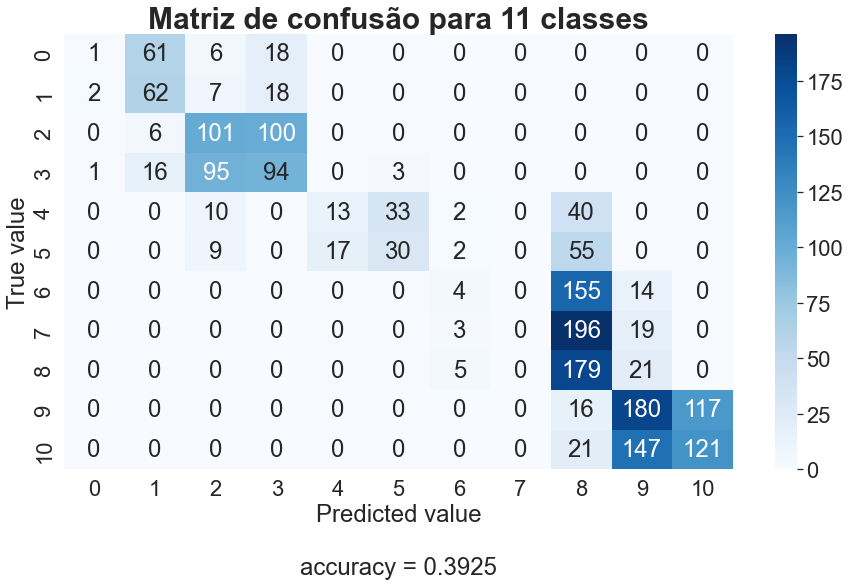

In [255]:
plt.figure(figsize=(15,8))
plt.title('Matriz de confusão para 11 classes', weight='bold').set_fontsize(30)
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='', cmap='Blues')
plt.xlabel(f'Predicted value\n\naccuracy = {acuracia}')
plt.ylabel('True value')
plt.show()

Como podemos observar pela matriz de confusão, apesar do modelo classificar os dados em 11 categorias diferentes ele ainda conseguiu uma acurácia relativamente alta, e aqueles valores que o modelo errou em classificar ficaram próximos dos valores reais. Posteriormente, podemos realizar um teste de hipótese para comprovar a nossa intuição que o modelo desempenha possui um desempenho melhor em classificar os dados

## 2.4. Regressão Logística multiclasse simplificada<a class="anchor" id="section-2-4"></a>
[Voltar ao topo](#section-0)

Como discutido na seção 1.2 [Simplificando classes](#section-1-2), **podemos** diminuir o número de classes para **simplificar o nosso modelo e aumentar sua acurácia**. Vamos fazer isso com a função *simplificar_motivacao* definida naquela seção.


In [340]:
train_set = pd.read_csv('train_set.tsv', sep='\t')
X_train = column_processors(train_set[['idade', 'renda']])
Y_train = simplificar_motivacao(train_set[['motivação']])

In [341]:
# Remover outliers
X_train = X_train[X_train['renda'].abs() < 2*X_train['renda'].std()]
Y_train = Y_train[X_train.index]

In [342]:
model = LogisticRegression().fit(X_train, Y_train)

In [343]:
test_set = pd.read_csv('test_set.tsv', sep='\t')
X_test = column_processors(test_set[['idade', 'renda']])
Y_test = simplificar_motivacao(test_set[['motivação']])

In [344]:
Y_pred = model.predict(X_test)

In [345]:
acuracia = accuracy_score(Y_test, Y_pred)
print(f'accuracy = {acuracia}')

accuracy = 0.7775


In [346]:
model.classes_

array(['desmotivados', 'motivados', 'neutros'], dtype='<U12')

In [347]:
for i in range(len(model.coef_)):
    print(f'For label {model.classes_[i]} feature weights = {model.coef_[i].round(2)}')

For label desmotivados feature weights = [11.35  2.2 ]
For label motivados feature weights = [-13.72  -3.38]
For label neutros feature weights = [2.37 1.17]


In [838]:
categories = ['desmotivados','neutros','motivados']
confusion_matrix(Y_test, Y_pred, labels=categories)

array([[908,  53,  14],
       [301,  82,  40],
       [  0,  37, 565]], dtype=int64)

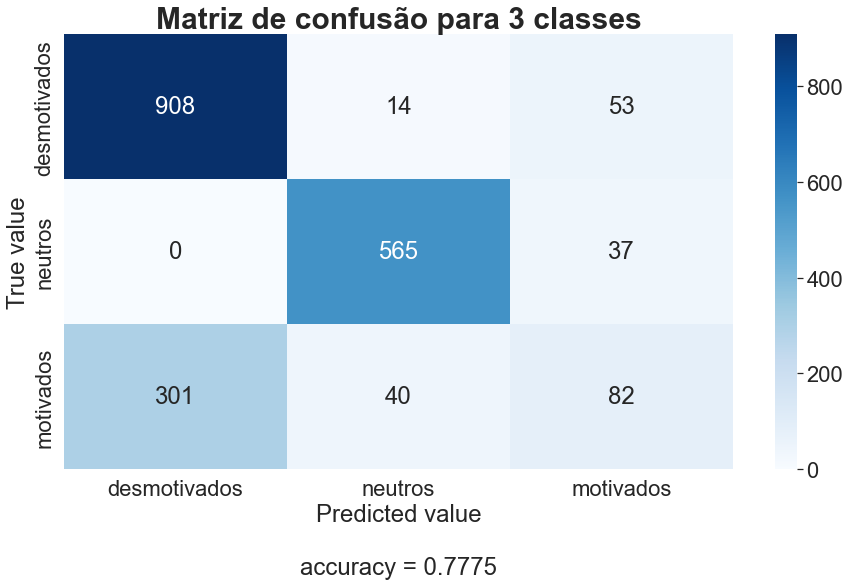

In [839]:
plt.figure(figsize=(15,8))
plt.title('Matriz de confusão para 3 classes', weight='bold').set_fontsize(30)
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel(f'Predicted value\n\naccuracy = {acuracia}')
plt.ylabel('True value')
plt.show()

Como podemos verificar na matriz de confusão, apesar de reconfiguramos as categorias de uma maneira arbitrária, isso melhorou a acurácia do nosso modelo. **Conseguimos uma acurácia relativamente alta**. Tivemos também muitos falsos negativos, como podemos ver no extremo inferior da primeira coluna. Podemos futuramente trabalhar mais na engenharia das features para diminuir essa taxa de falsos negativos e também realizar testes de hipótese para confirmar a acertividade do nosso modelo.

# 3. Predizendo renda dos alunos<a class="anchor" id="section-3"></a>
[Voltar ao topo](#section-0)

Como renda é um valor quantitativo **discreto**, podemos usar a **Regressão Linear** para predize-la.

In [185]:
from sklearn.linear_model import LinearRegression

## 3.1. Selecionando Features com o auxílio do scikit-learn<a class="anchor" id="section-3-1"></a>
[Voltar ao topo](#section-0)

In [186]:
# Seleciona as features numéricas do DataFrame e aplica scaling
to_select = column_processors(test_set[['idade', 'cor', 'sexo', 'ano_curso', 'escola', 'motivação']])

In [187]:
# define the method
selector = RFE(estimator=LinearRegression(), n_features_to_select=1)
# fit the model
selector = selector.fit(to_select, test_set[['renda']])
# Report feature ranking
pd.DataFrame({'coluna': to_select.columns}, index=selector.ranking_).sort_index().rename_axis('prioridade', axis=1)

prioridade,coluna
1,idade
2,2ano_curso
3,1ano_curso
4,motivação_9
5,motivação_8
6,motivação
7,escola
8,motivação_3
9,motivação_4
10,motivação_1


## 3.2. Regressão Linear (1 feature)<a class="anchor" id="section-3-2"></a>
[Voltar ao topo](#section-0)

In [202]:
from sklearn.metrics import r2_score

In [228]:
train_set = pd.read_csv('train_set.tsv', sep='\t')
X_train, Y_train = column_processors(train_set[['idade']]), train_set['renda']

In [229]:
# Remover outliers
Y_train = Y_train[Y_train.abs() < 3*Y_train.std()]
X_train = X_train.iloc[Y_train.index]

In [230]:
model = LinearRegression().fit(X_train, Y_train)

In [231]:
test_set = pd.read_csv('test_set.tsv', sep='\t')
X_test, Y_test = column_processors(test_set[['idade']]), test_set['renda']

In [232]:
Y_pred = model.predict(X_test)

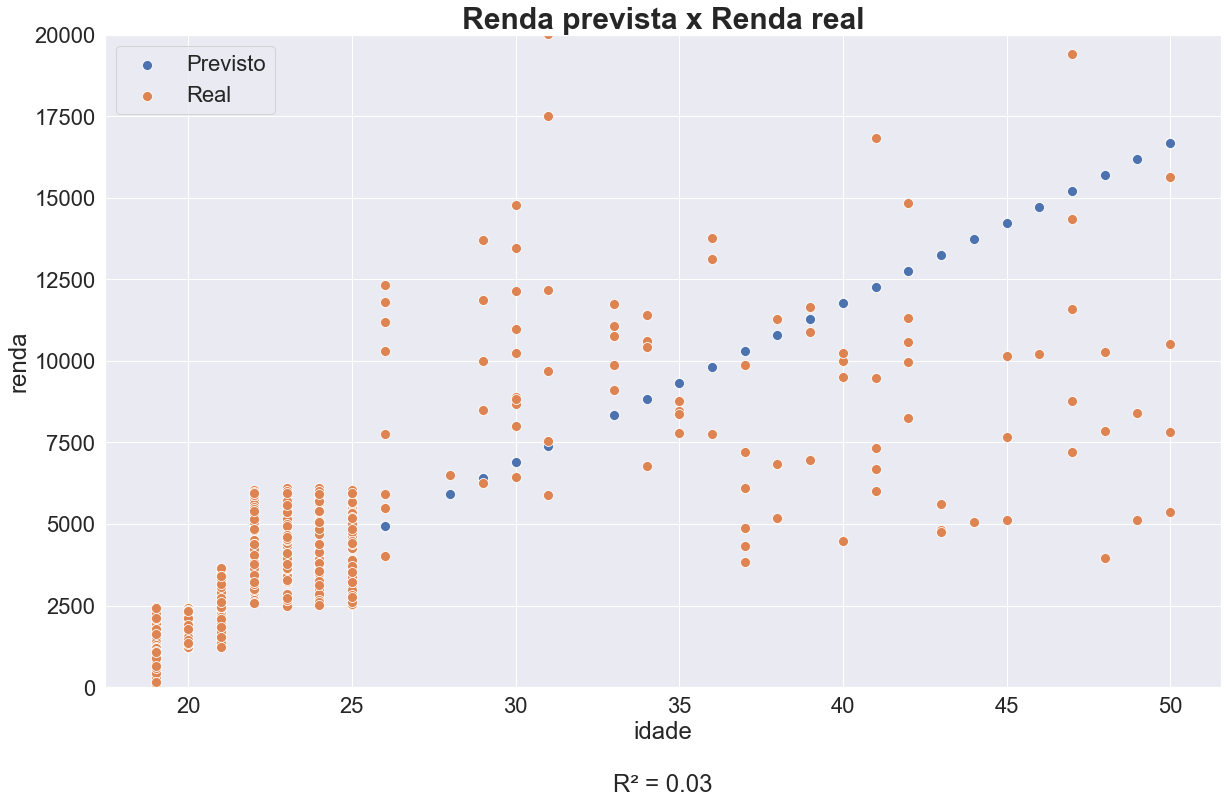

In [233]:
#sns.set_style("ticks")
plt.figure(figsize=(20,12))
sns.scatterplot(test_set['idade'], Y_pred, label='Previsto', s=100)
sns.scatterplot(test_set['idade'], Y_test, label='Real', s=100)
#plt.yscale('log')
plt.ylim(0,20000)
plt.legend()
plt.xlabel(f'idade\n\nR² = {r2_score(Y_test, Y_pred):.2f}')
plt.ylabel('renda')
plt.title('Renda prevista x Renda real', weight='bold').set_fontsize(30)
plt.show()

## 3.3. Regressão Linear multi-feature<a class="anchor" id="section-3-3"></a>
[Voltar ao topo](#section-0)

# EM CONTRUÇÃO

In [696]:
train_set = pd.read_csv('train_set.tsv', sep='\t')
X_train, Y_train = column_processors(train_set[['idade', 'motivação']]), train_set['renda']

In [717]:
column_processors(train_set[['idade', 'motivação']])

,idade,motivação,motivação_0,motivação_1,motivação_2,motivação_3,motivação_4,motivação_5,motivação_6,motivação_7,motivação_8,motivação_9
0,0.732335,-1.556416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.494486,0.962438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.494486,0.962438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.290015,-0.611845,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.085545,-0.611845,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.290015,0.332725,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7996,-0.290015,0.017868,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7997,-0.290015,0.017868,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7998,-0.494486,0.962438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [698]:
model = LinearRegression().fit(X_train, Y_train)

In [715]:
test_set = pd.read_csv('test_set.tsv', sep='\t')
X_test, Y_test = column_processors(test_set[['idade', 'motivação']]), test_set['renda']

[[5]
 [8]
 [9]
 ...
 [2]
 [9]
 [4]]


In [700]:
Y_pred = model.predict(X_test)

In [701]:
r2_score(Y_test, Y_pred)

0.12380285502196786